# References
https://geodata.lib.berkeley.edu/catalog/stanford-gn214np6763 (for tanzania polygon)\
https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html (for handling shape files)

In [179]:
import pandas as pd
import json
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
import numpy as np
from shapely.geometry import Point, shape


Tanzania_coord = (-6.3690,34.8888)

pd.set_option('display.max_columns', None)
# pd.reset_option(“max_columns”)

In [95]:
X_train = pd.read_csv('data/Training_set.csv')
y_train = pd.read_csv('data/Training_labels.csv')

X_test = pd.read_csv('data/Test_set.csv')

In [96]:
X_train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [98]:
y_train.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [114]:
with open('data/stanford-gn214np6763-geojson.json', 'r',encoding='utf8') as f:
    geoJSON_raw = json.load(f)

In [203]:
m=folium.Map(location=Tanzania_coord, zoom_start=5, tiles='CartoDB positron')
geo_j = folium.GeoJson(data=geoJSON_raw,
                           style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)

for each in X_train.iterrows():
    folium.Marker(
#         location=[each[1]['latitude'], each[1]['longitude']],
        location=[-9,35],
        icon=folium.Icon(color="blue",icon="tint", prefix='fa')
    ).add_to(m)
    break

m

In [174]:
tanzania_shape = shape(geo_j.data['features'][0]['geometry'])

In [201]:
p1 = Point(-9,35)

In [202]:
tanzania_shape.contains(p1)

False

# LAT and LONG

Some are marked as (lat,long) = (-2*e-8, 0) ~ (0,0) . In other words, location is missing.

1812 records ~ 3.050505 %

In [183]:
X_train.loc[(abs(X_train.longitude) <0.05) & (abs(X_train.latitude) <0.05)].region.unique()

array(['Shinyanga', 'Mwanza'], dtype=object)

In [99]:
X_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [200]:
for each in X_train.iterrows():
    p = Point(each[1]['latitude'],(each[1]['longitude']))
    if 
    print(tanzania_shape.contains(p))
    break

False


# NULLS

In [102]:
# Columns with nulls
X_train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [111]:
X_train[X_train.duplicated(subset=['latitude','longitude'])].sort_values(by='latitude')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
37766,18406,0.0,2011-03-16,Nethalan,576,Hanja Lt,37.314250,-7.177203e+00,Shule Yamsingi Maharaka,0,Wami / Ruvu,Mdugile,Morogoro,5,6,Mvomero,Doma,500,True,GeoData Consultants Ltd,VWC,NaN,True,1980,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
51672,14961,0.0,2011-03-16,Nethalan,580,DWE,37.318911,-7.177155e+00,Kwa Kisuguru,0,Wami / Ruvu,Mdugile,Morogoro,5,6,Mvomero,Doma,90,True,GeoData Consultants Ltd,VWC,NaN,True,1988,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
38604,64847,0.0,2011-03-16,Nethalan,590,RWE,37.328905,-7.175174e+00,Kwa Said Mlinda,0,Wami / Ruvu,Mabwe,Morogoro,5,6,Mvomero,Doma,100,True,GeoData Consultants Ltd,VWC,NaN,True,1985,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
50878,12615,0.0,2011-03-17,Government Of Tanzania,503,DWE,37.269036,-7.104923e+00,Kwa Beti,0,Wami / Ruvu,Songa,Morogoro,5,6,Mvomero,Doma,1,True,GeoData Consultants Ltd,VWC,NaN,True,1980,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
50330,36327,0.0,2011-03-24,Government Of Tanzania,499,DWE,37.250111,-7.104625e+00,Kwa Magera,0,Wami / Ruvu,Doma Store,Morogoro,5,6,Mvomero,Doma,1,True,GeoData Consultants Ltd,VWC,NaN,True,1991,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20300,43176,0.0,2011-08-02,Hesawa,0,Hesawa,0.000000,-2.000000e-08,Bombani,0,Lake Victoria,Idudumula,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
20266,26008,0.0,2013-02-05,Rwssp,0,DWE,0.000000,-2.000000e-08,Bondeni,0,Lake Victoria,Mwachonza,Shinyanga,17,1,Bariadi,Bumera,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
20237,35811,0.0,2012-10-21,Dwssp,0,DWE,0.000000,-2.000000e-08,Gurumbaka,0,Lake Victoria,Gurumbaka,Shinyanga,17,1,Bariadi,Mwadobana,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,swn 80,swn 80,handpump,parastatal,parastatal,never pay,never pay,salty abandoned,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
20863,48010,0.0,2013-02-22,Holland,0,HOLLAND,0.000000,-2.000000e-08,Gasadi,0,Lake Victoria,Laini B,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,swn 80,swn 80,handpump,parastatal,parastatal,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [54]:
X_train.shape[0]

59400

In [101]:
(X_train.village == X_train.subvillage).sum()

AttributeError: 'DataFrame' object has no attribute 'village'

In [85]:
for each in X_train.village:
    if isinstance(each,float):
        print(each)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [87]:
X_train.village.isna().sum()

371

In [88]:
X_train.subvillage.isna().sum()

371

In [7]:
X_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
df = pd.merge(X_train,y_train,on='id')

In [9]:
df.select_dtypes(np.number)

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [10]:
df = pd.DataFrame.copy(X_train)
df.drop(columns = ['id','longitude','latitude','gps_height'])
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [11]:
df['water_quality | quality_grup']= df.water_quality + df.quality_group

In [12]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [13]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [14]:
df['water_quality | quality_grup'].value_counts()

softgood                      50818
saltysalty                     4856
unknownunknown                 1876
milkymilky                      804
colouredcolored                 490
salty abandonedsalty            339
fluoridefluoride                200
fluoride abandonedfluoride       17
Name: water_quality | quality_grup, dtype: int64

In [15]:
df['wpt_type_to_wpt_type_grp'] = df.waterpoint_type +  df.waterpoint_type_group

In [16]:
df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [17]:
df.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [18]:
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Waitaliano                   1
Mwita Machota                1
Aixos                        1
Tingatinga Sec School        1
Stansilaus                   1
Name: funder, Length: 1897, dtype: int64

In [19]:
df.installer.value_counts()

DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Rashid Mahongwe        1
Mama Kapwapwa          1
KKKT Leguruki          1
Samweli                1
QUICKWINS              1
Name: installer, Length: 2145, dtype: int64

<AxesSubplot:>

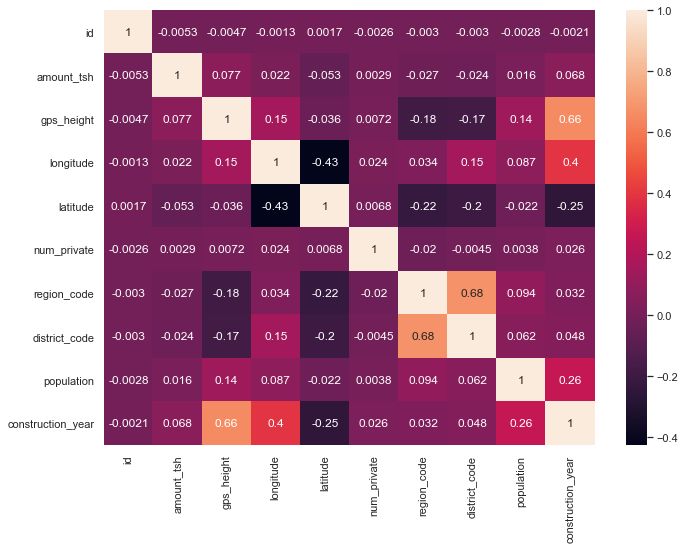

In [20]:
sns.heatmap(df.corr(),annot= True)

In [25]:
df.gps_height.sort_values()

58934     -90
15193     -63
50296     -63
14285     -59
41165     -57
         ... 
21388    2626
35453    2626
12905    2627
40822    2628
17374    2770
Name: gps_height, Length: 59400, dtype: int64

In [27]:
df_highest = df[df.gps_height>2500].sort_values(by='gps_height')

In [36]:
df_highest.status_group

AttributeError: 'DataFrame' object has no attribute 'status_group'

In [109]:
import folium

m = folium.Map(location = (-2.000000e-08,0), tiles = "Stamen Watercolor", zoom_start = 10)
number_of_markers = 100
i=0
for each in df_highest.iterrows():    
    folium.Marker(
        location=[each[1]['latitude'], each[1]['longitude']],
        icon=folium.Icon(color="green",icon="money", prefix='fa')
    ).add_to(m)
        
m

In [37]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'water_quality | quality_grup',
       'wpt_type_to_wpt_type_grp'],
      dtype='object')

# New heading